# Deep Learning Experiments

This notebook records ouputs during training models.

In [1]:
# system imports
import os
from termcolor import colored

# data manipulation and data clean
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# data pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# self-defined
from document import document 
import pipeline

# default data path
DATA_PATH = '../data'
GLOVE_PATH = '../glove.6B'
TRAIN_DIR = os.path.join(DATA_PATH, "train")
TEST_DIR = os.path.join(DATA_PATH, "test")

Using TensorFlow backend.


In [2]:
# default parameters
stop_words = stopwords.words('english')
stop_words = stop_words + ['would','could','may','also', 'one', 'two', 'three', 
                           'first', 'second' ,'third',
                           'someone', 'anyone', 'something', 'anything', 
                           'subject', 'organization', 'lines',
                           'article', 'writes', 'wrote']
tokenize_regex1 = r"\w+|\$[\d\.]+"
tokenize_regex2 = r"[a-zA-Z_]+"

In [3]:
# load data
print (colored('Loading files into memory', 'green', attrs=['bold']))

train_path_list, ylabel_train = pipeline.parse_files(TRAIN_DIR)
test_path_list, ylabel_test = pipeline.parse_files(TEST_DIR)

train_documents = [pipeline.load_document(path = path, label = y) for \
                   path, y in zip(train_path_list, ylabel_train)]
test_documents = [pipeline.load_document(path = path, label = y) for \
                  path, y in zip(test_path_list, ylabel_test)]

# clean all documents
print (colored('Cleaning all files', 'green', attrs=['bold']))
pipeline.clean_all_documents(train_documents, 
                             word_split_regex = tokenize_regex2,
                             stop_words = stop_words,
                             contraction_dict = 'default')
pipeline.clean_all_documents(test_documents,
                             word_split_regex = tokenize_regex2,
                             stop_words = stop_words,
                             contraction_dict = 'default')


# encode labels
print (colored('Encoding labels', 'green', attrs=['bold']))
y_train, y_test, category = pipeline.label_encoder(ylabel_train, ylabel_test, 'ordinal')

# calculate word embeddings
print (colored('Calculating word index representation', 'green', attrs=['bold']))

# parameter
max_sequence_length = 300   # max words to consider in a document
max_num_words = 20000       # max words to include in the vocabulary 
embedding_dim = 100

X_train_index, X_test_index, word_index = pipeline.DocumentToWordTndex(train_documents, test_documents,
                                             max_sequence_length, max_num_words)
print(f'Found {len(word_index)} unique tokens/words')
print(f'The maximum word index is {X_train_index.max()}')
print ("The shape of X after processing is: \ntrain: %s, test: %s"\
       %(X_train_index.shape, X_test_index.shape))

print (colored('Matching with GloVe vectors', 'green', attrs=['bold']))
embedding_matrix, unmathced = pipeline.construct_embedding_matrix(GLOVE_PATH, word_index, max_num_words, 
                                              embedding_dim, verbose=6)

Loading files into memory
Body text from ../data/train/rec.autos/101675 is empty.
Body text from ../data/train/comp.sys.mac.hardware/51839 is empty.
Body text from ../data/train/comp.sys.mac.hardware/51541 is empty.
Body text from ../data/train/rec.sport.baseball/104518 is empty.
Body text from ../data/train/comp.os.ms-windows.misc/9972 is empty.
Body text from ../data/train/comp.os.ms-windows.misc/9813 is empty.
Body text from ../data/train/rec.sport.hockey/52654 is empty.
Body text from ../data/train/sci.med/59367 is empty.
Body text from ../data/train/rec.motorcycles/103233 is empty.
Body text from ../data/train/comp.windows.x/67032 is empty.
Body text from ../data/train/comp.graphics/37928 is empty.
Body text from ../data/train/comp.graphics/38234 is empty.
Body text from ../data/train/comp.sys.ibm.pc.hardware/60353 is empty.
Body text from ../data/train/comp.sys.ibm.pc.hardware/60360 is empty.
Body text from ../data/train/misc.forsale/74724 is empty.
Body text from ../data/train/m

## Weight Visualization

### Tf-idf

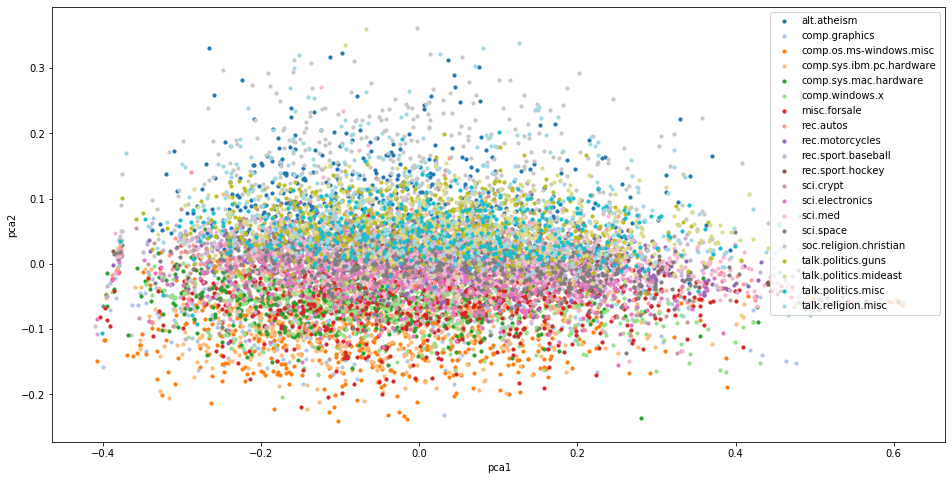

In [6]:
pipeline.plot_feature_pca(X_train_tfidf, y_train, category)

## CNN+LSTM

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          2000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 32)           9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 150, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 150, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 75, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 20)               

/Users/xchen/opt/anaconda3/envs/ds_37/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6649 samples, validate on 4434 samples
Epoch 1/20
6649/6649 [==============================] - 13s 2ms/step - loss: 2.5844 - f1_metric: 0.0166 - val_loss: 1.9741 - val_f1_metric: 0.1299
— val_f1: 0.069389 — val_precision: 0.110726 — val_recall 0.059467 -
Epoch 2/20
6649/6649 [==============================] - 12s 2ms/step - loss: 1.8061 - f1_metric: 0.1924 - val_loss: 1.5292 - val_f1_metric: 0.3417
— val_f1: 0.219538 — val_precision: 0.318308 — val_recall 0.200117 -
Epoch 3/20
6649/6649 [==============================] - 12s 2ms/step - loss: 1.4615 - f1_metric: 0.3606 - val_loss: 1.3101 - val_f1_metric: 0.4432
— val_f1: 0.326991 — val_precision: 0.602891 — val_recall 0.282232 -
Epoch 4/20
6649/6649 [==============================] - 12s 2ms/step - loss: 1.2141 - f1_metric: 0.4811 - val_loss: 1.1709 - val_f1_metric: 0.5275
— val_f1: 0.402914 — val_precision: 0.690102 — val_recall 0.371966 -
Epoch 5/20
6649/6649 [==============================] - 12s 2ms/step - loss: 1.0486 - f1

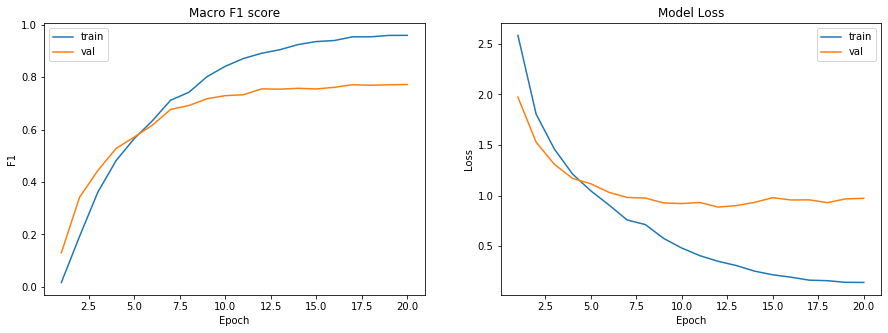

6649/6649 [==============================] - 2s 336us/step
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.59      0.65       179
           comp.graphics       0.69      0.70      0.69       226
 comp.os.ms-windows.misc       0.76      0.62      0.69       254
comp.sys.ibm.pc.hardware       0.62      0.53      0.57       234
   comp.sys.mac.hardware       0.67      0.67      0.67       254
          comp.windows.x       0.66      0.79      0.72       228
            misc.forsale       0.68      0.68      0.68       219
               rec.autos       0.77      0.86      0.81       238
         rec.motorcycles       0.87      0.86      0.87       230
      rec.sport.baseball       0.94      0.89      0.91       223
        rec.sport.hockey       0.97      0.78      0.87        74
               sci.crypt       0.84      0.85      0.85       240
         sci.electronics       0.62      0.77      0.69    

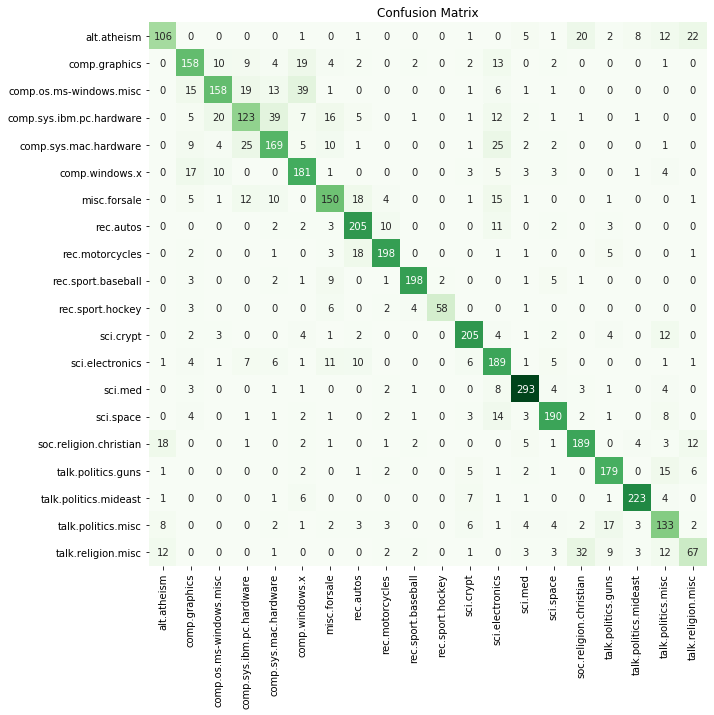

In [4]:
# train a CNN network
epochs = 20
batch_size = 64 #8, 16, 32, 64, 128, 256
num_classes = np.unique(y_train).shape[0]

# build model
model = pipeline.get_cnn_model(embedding_matrix, max_sequence_length, num_classes)
# train model
f1_cnn_train, fi_cnn_test, f1_list = pipeline.train_dl_classifier(X_train_index, y_train, model, 
                                                                  test_size=0.4, y_names=category, 
                                                                  epochs=epochs, batch_size=batch_size,
                                                                  verbose=1, confusion=True, random_state=42)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          2000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 32)           9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 150, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 150, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 75, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 20)               

/Users/xchen/opt/anaconda3/envs/ds_37/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8866 samples, validate on 2217 samples
Epoch 1/20
8866/8866 [==============================] - 34s 4ms/step - loss: 2.0571 - f1_metric: 0.1575 - val_loss: 1.4551 - val_f1_metric: 0.3373
— val_f1: 0.230346 — val_precision: 0.418143 — val_recall 0.201217 -
Epoch 2/20
8866/8866 [==============================] - 35s 4ms/step - loss: 1.2965 - f1_metric: 0.4490 - val_loss: 1.1669 - val_f1_metric: 0.5416
— val_f1: 0.426918 — val_precision: 0.610658 — val_recall 0.390389 -
Epoch 3/20
8866/8866 [==============================] - 34s 4ms/step - loss: 0.9617 - f1_metric: 0.6144 - val_loss: 0.9544 - val_f1_metric: 0.6599
— val_f1: 0.583314 — val_precision: 0.748090 — val_recall 0.529644 -
Epoch 4/20
8866/8866 [==============================] - 33s 4ms/step - loss: 0.7379 - f1_metric: 0.7214 - val_loss: 0.8759 - val_f1_metric: 0.7175
— val_f1: 0.657528 — val_precision: 0.786157 — val_recall 0.615918 -
Epoch 5/20
8866/8866 [==============================] - 34s 4ms/step - loss: 0.5441 - f1

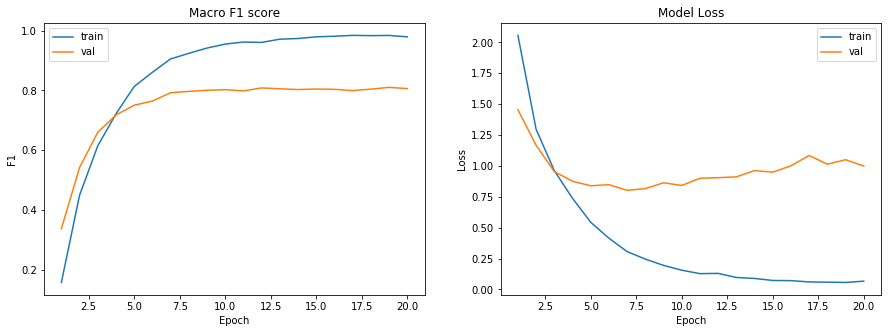

8866/8866 [==============================] - 4s 437us/step
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.74      0.68      0.71        92
           comp.graphics       0.59      0.70      0.64        99
 comp.os.ms-windows.misc       0.78      0.74      0.76       135
comp.sys.ibm.pc.hardware       0.67      0.69      0.68       119
   comp.sys.mac.hardware       0.70      0.75      0.72       119
          comp.windows.x       0.80      0.75      0.77       123
            misc.forsale       0.79      0.72      0.75        96
               rec.autos       0.84      0.86      0.85       112
         rec.motorcycles       0.90      0.89      0.90       131
      rec.sport.baseball       0.91      0.94      0.93        99
        rec.sport.hockey       0.94      0.84      0.89        38
               sci.crypt       0.94      0.86      0.90       128
         sci.electronics       0.83      0.71      0.77    

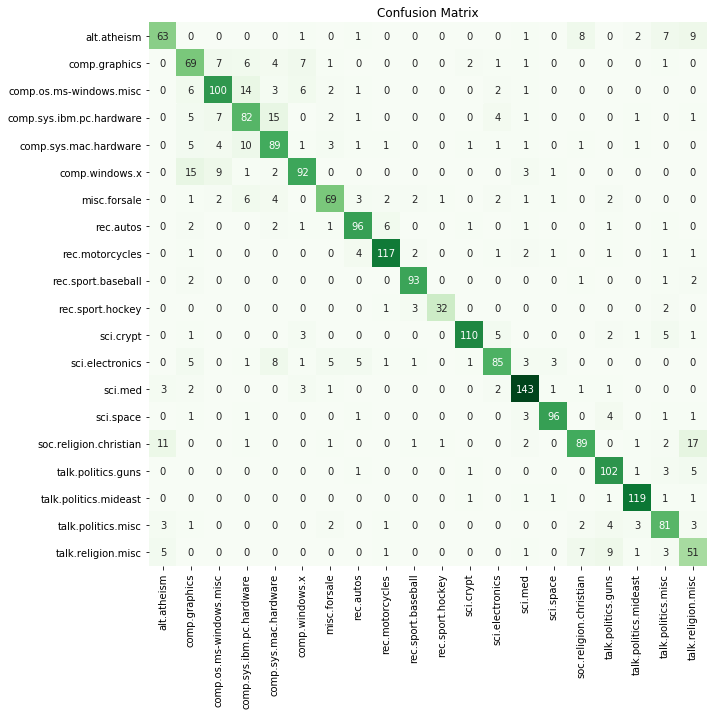

In [19]:
# train a CNN network
epochs = 20
batch_size = 16 #8, 16, 32, 64, 128, 256
num_classes = np.unique(y_train).shape[0]

# build model
model = pipeline.get_cnn_model(embedding_matrix, max_sequence_length, num_classes)
# train model
f1_cnn_train, fi_cnn_test, f1_list = pipeline.train_dl_classifier(X_train_index, y_train, model, 
                                                                  test_size=0.2, y_names=category, 
                                                                  epochs=epochs, batch_size=batch_size,
                                                                  verbose=1, confusion=True, random_state=42)

In [21]:
# save model
name = 'cnn_batch_%d_epoch_%d'%(batch_size,epochs)
print (colored("Saving model to as %s.h"%(name), 'magenta', attrs=['bold']))
pipeline.model_save(model, name)

Saving model to as cnn_batch_16_epoch_20.h


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          2000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 32)           9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 150, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 150, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 75, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 20)               

/Users/xchen/opt/anaconda3/envs/ds_37/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8866 samples, validate on 2217 samples
Epoch 1/15
8866/8866 [==============================] - 33s 4ms/step - loss: 2.0936 - f1_metric: 0.1407 - val_loss: 1.5057 - val_f1_metric: 0.3352
— val_f1: 0.219444 — val_precision: 0.345544 — val_recall 0.197044 -
Epoch 2/15
8866/8866 [==============================] - 34s 4ms/step - loss: 1.3358 - f1_metric: 0.4307 - val_loss: 1.1733 - val_f1_metric: 0.5250
— val_f1: 0.414954 — val_precision: 0.572409 — val_recall 0.371910 -
Epoch 3/15
8866/8866 [==============================] - 32s 4ms/step - loss: 0.9837 - f1_metric: 0.6062 - val_loss: 1.0405 - val_f1_metric: 0.6409
— val_f1: 0.580863 — val_precision: 0.734633 — val_recall 0.521775 -
Epoch 4/15
8866/8866 [==============================] - 32s 4ms/step - loss: 0.7200 - f1_metric: 0.7330 - val_loss: 0.8617 - val_f1_metric: 0.7236
— val_f1: 0.694554 — val_precision: 0.787892 — val_recall 0.647667 -
Epoch 5/15
8866/8866 [==============================] - 32s 4ms/step - loss: 0.5478 - f1

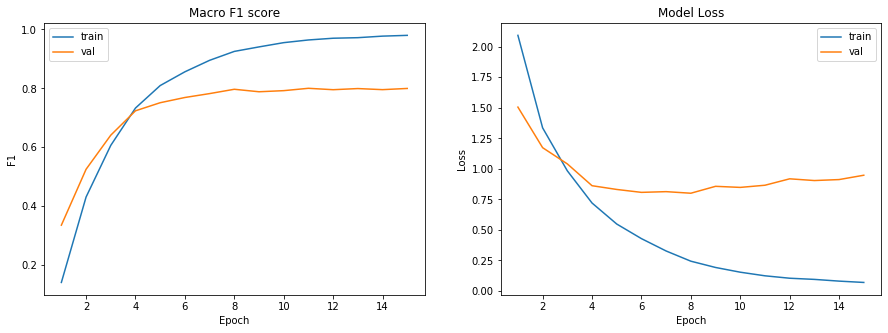

8866/8866 [==============================] - 4s 419us/step
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.90      0.62      0.74        92
           comp.graphics       0.51      0.81      0.62        99
 comp.os.ms-windows.misc       0.77      0.65      0.71       135
comp.sys.ibm.pc.hardware       0.66      0.67      0.66       119
   comp.sys.mac.hardware       0.76      0.71      0.74       119
          comp.windows.x       0.81      0.77      0.79       123
            misc.forsale       0.61      0.73      0.67        96
               rec.autos       0.83      0.81      0.82       112
         rec.motorcycles       0.91      0.83      0.87       131
      rec.sport.baseball       0.96      0.92      0.94        99
        rec.sport.hockey       0.97      0.84      0.90        38
               sci.crypt       0.94      0.88      0.91       128
         sci.electronics       0.81      0.74      0.77    

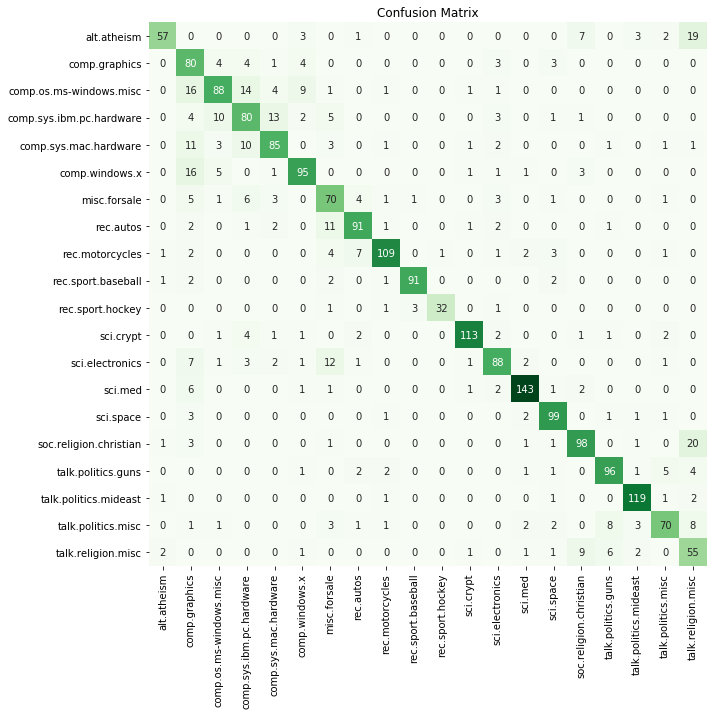

In [5]:
# train a CNN network
epochs = 15
batch_size = 16 #8, 16, 32, 64, 128, 256
num_classes = np.unique(y_train).shape[0]

# build model
model = pipeline.get_cnn_model(embedding_matrix, max_sequence_length, num_classes)
# train model
f1_cnn_test,f1_cnn_test,  f1_list = pipeline.train_dl_classifier(X_train_index, y_train, model, 
                                                                  test_size=0.2, y_names=category, 
                                                                  epochs=epochs, batch_size=batch_size,
                                                                  verbose=1, confusion=True, random_state=42)

In [9]:
print(f1_cnn_train,f1_cnn_test)

0.7926422468634453 0.9954061944661229


In [10]:
f1_list

[0.2194443303479988,
 0.41495391570302054,
 0.5808626238342615,
 0.6945544500549751,
 0.7384799942813308,
 0.7578781229719954,
 0.7766176732073597,
 0.7911459141397327,
 0.7829221243049147,
 0.7862926212189454,
 0.7946287006987338,
 0.788752202531279,
 0.7963361711368264,
 0.7888899762878546,
 0.7969246344289839]

In [6]:
# save model
name = 'cnn_batch_%d_epoch_%d'%(batch_size,epochs)
print (colored("Saving model to as %s.h"%(name), 'magenta', attrs=['bold']))
pipeline.model_save(model, name)

Saving model to as cnn_batch_16_epoch_15.h


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          2000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 32)           9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 150, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 150, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 75, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 20)               

/Users/xchen/opt/anaconda3/envs/ds_37/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8866 samples, validate on 2217 samples
Epoch 1/10
8866/8866 [==============================] - 35s 4ms/step - loss: 2.1015 - f1_metric: 0.1470 - val_loss: 1.4983 - val_f1_metric: 0.3685
— val_f1: 0.262367 — val_precision: 0.405583 — val_recall 0.228185 -
Epoch 2/10
8866/8866 [==============================] - 34s 4ms/step - loss: 1.3193 - f1_metric: 0.4417 - val_loss: 1.1173 - val_f1_metric: 0.5623
— val_f1: 0.450400 — val_precision: 0.693858 — val_recall 0.403973 -
Epoch 3/10
8866/8866 [==============================] - 33s 4ms/step - loss: 0.9700 - f1_metric: 0.6215 - val_loss: 0.9606 - val_f1_metric: 0.6645
— val_f1: 0.586264 — val_precision: 0.801344 — val_recall 0.538265 -
Epoch 4/10
8866/8866 [==============================] - 33s 4ms/step - loss: 0.7213 - f1_metric: 0.7408 - val_loss: 0.8453 - val_f1_metric: 0.7307
— val_f1: 0.706725 — val_precision: 0.794384 — val_recall 0.653608 -
Epoch 5/10
8866/8866 [==============================] - 32s 4ms/step - loss: 0.5095 - f1

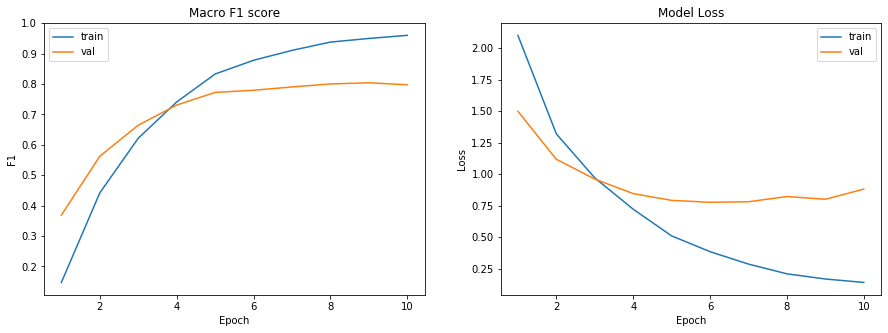

8866/8866 [==============================] - 4s 401us/step
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.67      0.67      0.67        92
           comp.graphics       0.64      0.69      0.66        99
 comp.os.ms-windows.misc       0.71      0.78      0.74       135
comp.sys.ibm.pc.hardware       0.71      0.68      0.70       119
   comp.sys.mac.hardware       0.79      0.71      0.75       119
          comp.windows.x       0.70      0.86      0.77       123
            misc.forsale       0.71      0.67      0.69        96
               rec.autos       0.84      0.84      0.84       112
         rec.motorcycles       0.95      0.79      0.86       131
      rec.sport.baseball       0.91      0.90      0.90        99
        rec.sport.hockey       0.94      0.84      0.89        38
               sci.crypt       0.84      0.88      0.86       128
         sci.electronics       0.79      0.76      0.78    

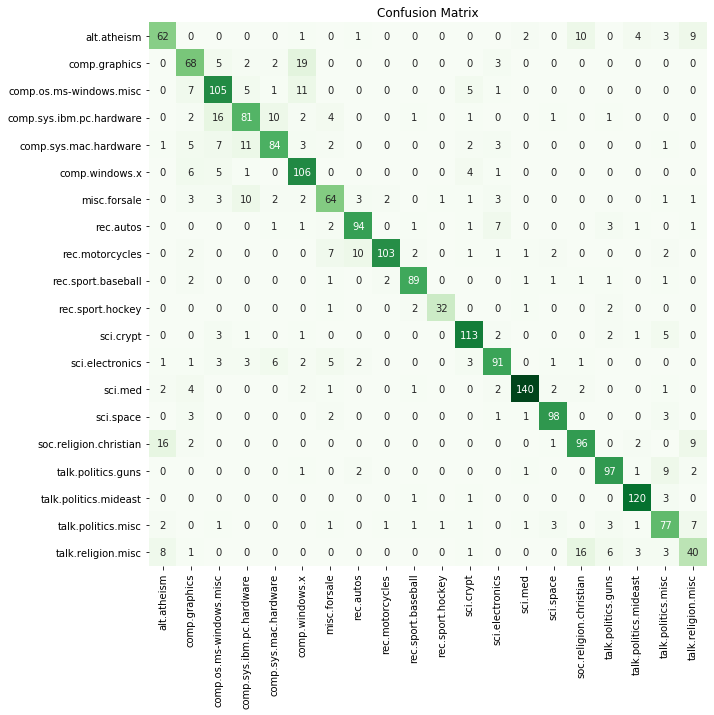

In [12]:
# train a CNN network
epochs = 10
batch_size = 16 #8, 16, 32, 64, 128, 256
num_classes = np.unique(y_train).shape[0]

# build model
model = pipeline.get_cnn_model(embedding_matrix, max_sequence_length, num_classes)
# train model
f1_cnn_test,f1_cnn_test,  f1_list = pipeline.train_dl_classifier(X_train_index, y_train, model, 
                                                                  test_size=0.2, y_names=category, 
                                                                  epochs=epochs, batch_size=batch_size,
                                                                  verbose=1, confusion=True, random_state=42)

In [13]:
print(f1_cnn_train,f1_cnn_test)

0.7926422468634453 0.9844310739469352


In [14]:
# save model
name = 'cnn_batch_%d_epoch_%d'%(batch_size,epochs)
print (colored("Saving model to as %s.h"%(name), 'magenta', attrs=['bold']))
pipeline.model_save(model, name)

Saving model to as cnn_batch_16_epoch_10.h


Predicting test dataset...
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.51      0.57      0.54       319
           comp.graphics       0.67      0.60      0.63       389
 comp.os.ms-windows.misc       0.57      0.68      0.62       394
comp.sys.ibm.pc.hardware       0.54      0.58      0.56       392
   comp.sys.mac.hardware       0.68      0.62      0.65       385
          comp.windows.x       0.63      0.71      0.67       395
            misc.forsale       0.74      0.66      0.70       390
               rec.autos       0.80      0.74      0.77       395
         rec.motorcycles       0.90      0.76      0.83       398
      rec.sport.baseball       0.72      0.86      0.79       397
        rec.sport.hockey       0.99      0.77      0.86       827
               sci.crypt       0.67      0.85      0.75       396
         sci.electronics       0.62      0.55      0.58       393
                 sci.med 

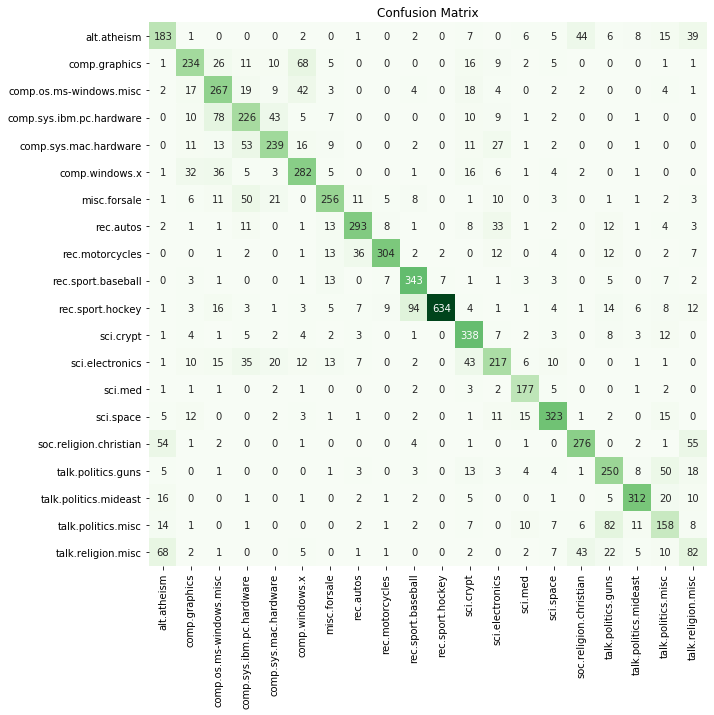

In [15]:
print (colored('Predicting test dataset...', 'magenta', attrs=['bold']))
y_pred_dl = pipeline.model_evaluate(model, X_test_index)
pipeline.model_report(y_test, y_pred_dl, y_names=category, confusion=True)
